# Predicting Wine Quality: 
**By:** 
- Nikki de Vries
- Saul Gonzalez 
- Stephen Spivey

# The Goal: 
- Find drivers of wine quality for the california wine insitiute. 
- Based on the drivers, utilize clusters to make a regression model to predict wine quality.

# Initial Questions:
1. 

# Project Outline: 
1. Data Acquisition: 
    -  Acquire the data from: https://data.world/food/wine-quality
2. Data Preparation:
    - Combined the white and red csv's into a since csv
    - Clean the column data types
    - Investigate missing values
    - Investigate outliers
3. Data Exploration: 
    - Analyze the Uni/Bi/Multivariate variables to see how features interact. 
    - Use clustering to explore the data:
    - Conduct hypothesis testing
    - Correlation testing
4. Modeling: 
    - Create 4 modules based on the clusters and features discovered
5. Presentation:
    - 5 minute storytelling presentation based on drivers of wine quality

### Imports

In [25]:
# envivormental imports:
import final_wrangle as wr
import final_explore as ex
import final_modeling as md


#core imports: 
import numpy as np
import pandas as pd
from scipy import stats 


#visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# Acquire: 
- Data was imported from the wine quality link and converted into a single dataframe. 
- An additional column was created: wine_color for distinction between white and red wines.

In [2]:
# import the wine dataframe: 
df = wr.wine_df()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Data Preparation: 
- Steps taken to clean the data: 
    - Remove outliers. Removing the outliers with a K = 3 will remove 5 % of the data. 
    - Change the wine_color column to be numerical. 1 indicates red while 0 indicates white.
    - Change column names to have underscores for spaces.
    - Make all the data types the same.
    - Split the data

In [3]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [4]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [5]:
clean_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,is_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0


In [6]:
# split the data into train, validate, and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

# Explore:
- Explore the Uni/Bi/Multivariate varibales
- Produce 3 Hypothesis tests
- Produce 3 clusters
- Summarize key features and takeaways

## 1. Does quality differ across wine color? 
$H_0$: There is no difference in the mean quality of red vs white wine color. <br>
$H_a$: There is a difference in the mean quality of red vs white wine color.

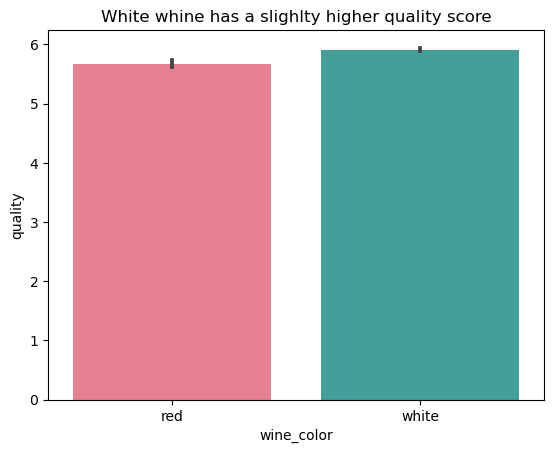

In [7]:
# create vizualization
sns.barplot(x = 'wine_color', y = 'quality', data = train, palette = 'husl')
plt.title('White whine has a slighlty higher quality score')
plt.show()

> The wine colors are: 0.0 = White, 1.0 = Red.

The type of test: Categorical vs Continous is a Comparison on Means test. <br>
**Assumptions:** <br>
- Normaly Distributed: Quality is not normally distributed.
- Subpop vs subpop = Mann Whitneyu test.

In [8]:
# complete the test: 
red = train[train.wine_color == 'red'].quality
white = train[train.wine_color == 'white'].quality

stat, p_val = stats.mannwhitneyu(red, white)
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
    print(f'P_value: {p_val}')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.
P_value: 3.584515576519506e-12


> White wine tends to have a higher quality compared to red wine. This could be a good feature to look at.

## 2. Is there a relationship between quality and alcohol?
$H_0$: There is no monotonic relationship between quality and alcohol. <br>
$H_a$: There is a monotonic relationship between quality and alcohol.

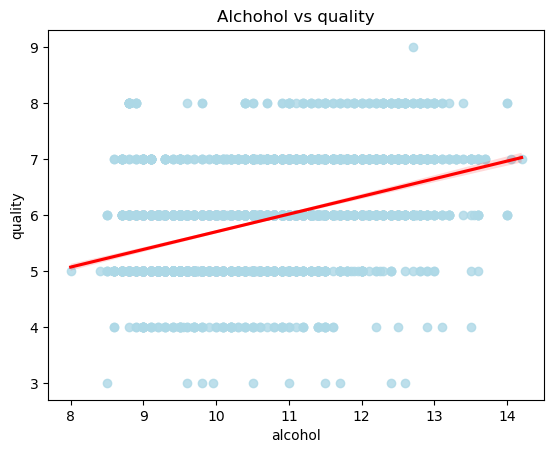

In [9]:
# graph: 
sns.regplot(data = train, x = 'alcohol', y = 'quality', line_kws={'color':'red'}, color = 'lightblue')
plt.title('Alchohol vs quality')
plt.show()

The type of test: Continuous vs Continuous is a Correlation test. <br>
**Assumptions:** <br>
- Normally Distributed: Quality is not normally distributed
- Subpop vs subpop = Spearman's r

In [10]:
#complete a spearmans test: 
r, p = stats.spearmanr(train['alcohol'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.438994.
P-value: 1.9826706494849643e-162


> There appears to be a relationship between wine quality and alcohol content. It looks like as alcohol content increases, so does wine quality!

# 3. Is there a relationship between quality and chlorides?
$H_0$: There is no monotonic relationship between quality and chlorides. <br>
$H_a$: There is a monotonic relationship between quality and chlorides.

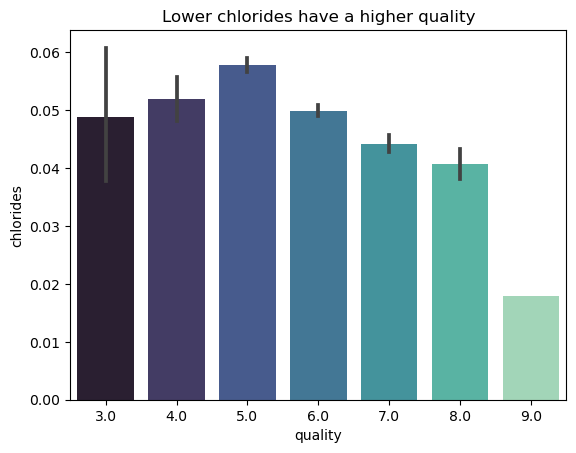

In [11]:
#graph: 
sns.barplot(x = 'quality', y = 'chlorides', data = train, palette = 'mako')
plt.title('Lower chlorides have a higher quality')
plt.show()

In [12]:
# complete a spearmans r test: 
r, p = stats.spearmanr(train['chlorides'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.281351.
P-value: 9.401498914241552e-64


# Clustering: 
- Features that may have potential clusters: 
    - Alcohol vs Sulphates
    - Free sulfur dioxide vs Total sulfur dioxide
    - Volatile acidity vs density
    - Citric Acid vs pH

## Cluster 1

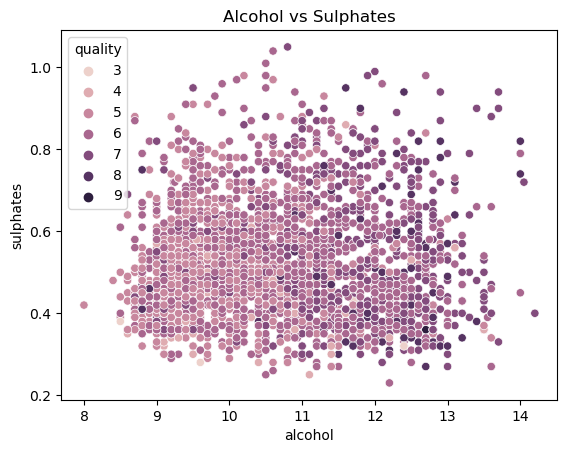

In [13]:
# create the cluster: 
sns.scatterplot(x = 'alcohol', y = 'sulphates', data = train, hue = 'quality')
plt.title('Alcohol vs Sulphates')
plt.show()

> There is a trend in the clusters: As alcohol is over 11 there seems to be a higher percentage in quality. <br>
> The number of clusters are 4

## Cluster 2

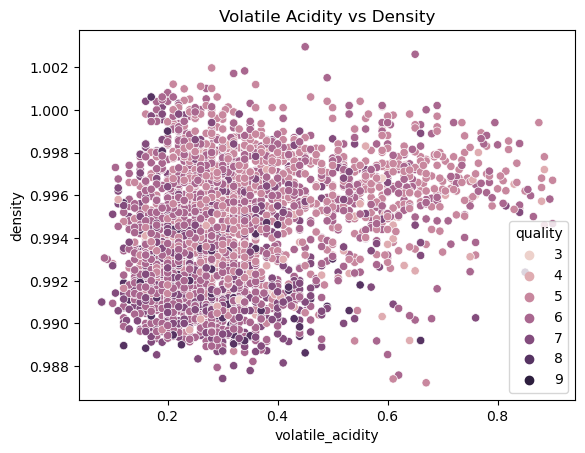

In [14]:
sns.scatterplot(x = 'volatile_acidity', y = 'density', data = train, hue = 'quality')
plt.title('Volatile Acidity vs Density')
plt.show()

> As volatile acidity and density decreases there seems to be a increase in quality of the wine. Vise Versa as density increases a volatile acidity increases the quality decreases. <br>
> There are 4 clusters.

# Cluster 3

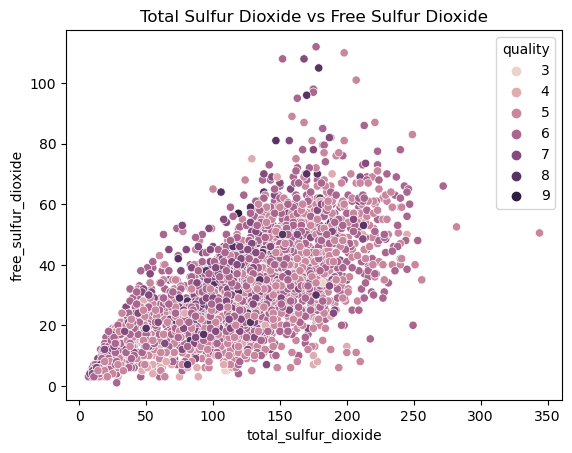

In [15]:
sns.scatterplot(x = 'total_sulfur_dioxide', y = 'free_sulfur_dioxide', data = train, hue = 'quality')
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.show()

> As free sulfur dioxide and total sulfur dioxide increase it looks quality increases. The lower quality wines tend to stay around lower free sulfur dioxide. <br>
> 

# Explore Summary: 
- Features impact wine quality are: 
    - Wine Color
    - Chlorides
    - Alcohol
- Features with the biggest correlation (based on heatmap): 
    - Alcohol (0.45)
- Features with medium correlation (based on heatmap):
    - Sulphates (0.27) 
    - Citric Acid (0.089)
    - Free Sulfur Dioxide (0.063)
    - pH (0.0062)
- Features with lowest correlation (based on heatmap): 
    - Residual sugar (-0.036)
    - Total sulfur dioxide (-0.039)
    - Fixed acidity (-0.065)
    - Chlorides (-0.2)
    - Volatile Acidity (-0.27)
    - Density (-0.31)
 
 
 
**Features used in modeling will be**
1. Wine Color: There is some significance.
2. Chlorides: There is some significance.
3. Clustering of Alcohol and Sulphates: There are noticable clusters.
4. Clustering of Citric Acid and pH: There are noticable clusters.
5. Clustering of Free Sulfur Dioxide and Total Sulfur Dioxide. There are noticable clusters. 
6. Volatile Acidity and Density: There are noticable clusters.

# Preprocessing: 
- Drop categorical columns 
- Scale the data

In [16]:
# drop column: 
del clean_df['wine_color']
del train['wine_color']
del validate['wine_color']
del test['wine_color']

In [17]:
# scale the data: 
to_scale = list(clean_df.columns)
train, validate, test = wr.scale_data(train, validate, test, to_scale)

# Modeling:
1. Need to add clusters to train, validate, and test. All the datasets operated best at a number of cluster being around 4. This is where the "elbow" was.
2. Create a Linear regression model using these features:
    - Wine Color
    - Chlorides
    - Cluster 1 
    - Cluster 2
    - Cluster 3
    - Cluster 4

### Cluster 1: Alcohol vs Sulphates

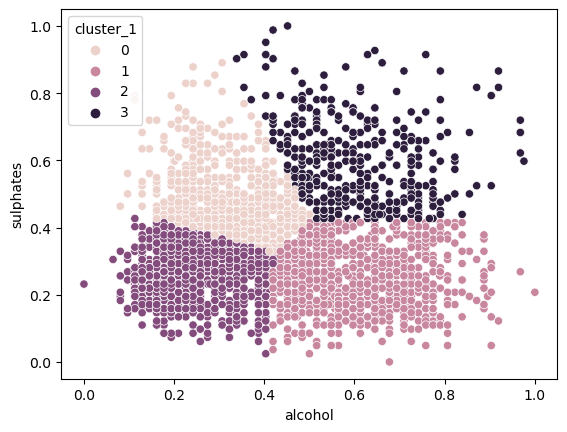

In [19]:
train, validate, test = md.cluster_1(train, validate, test)

### Cluster 2: Free Sulfur Dioxide vs Total Sulfur Dioxide

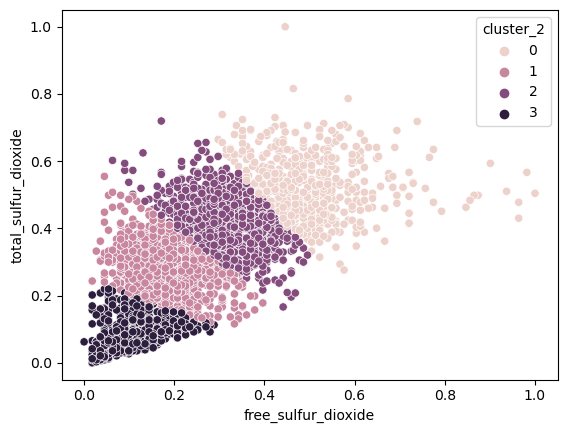

In [20]:
train, validate, test = md.cluster_2(train, validate, test)

### Cluster 3: Volaite Acidity vs Density

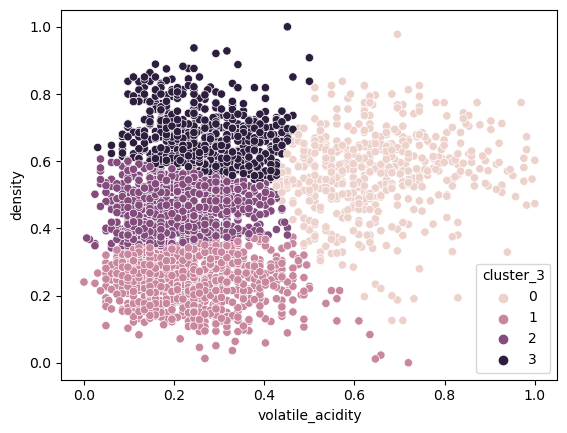

In [21]:
train, validate, test = md.cluster_3(train, validate, test)

### Cluster 4: Citric Acid vs pH

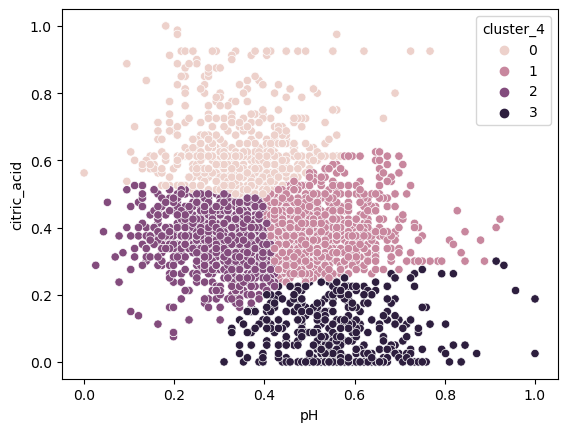

In [22]:
train, validate, test = md.cluster_4(train, validate, test)

In [23]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_white,cluster_1,cluster_2,cluster_3,cluster_4
621,0.571429,0.585366,0.2875,0.110020,0.556452,0.117117,0.287834,0.659886,0.465517,0.475610,0.225806,0.333333,1.0,0,1,0,1
3092,0.545455,0.317073,0.6125,0.330059,0.193548,0.342342,0.513353,0.405594,0.336207,0.182927,0.693548,0.833333,0.0,1,2,2,0
5926,0.337662,0.195122,0.3250,0.298625,0.362903,0.414414,0.519288,0.518754,0.327586,0.329268,0.241935,0.333333,0.0,2,0,2,2
661,0.480519,0.414634,0.3875,0.039293,0.572581,0.126126,0.103858,0.672600,0.491379,0.500000,0.161290,0.333333,1.0,0,3,3,1
1140,0.454545,0.390244,0.3750,0.043222,0.572581,0.288288,0.213650,0.615385,0.577586,0.512195,0.241935,0.500000,1.0,0,1,3,1


# Modeling:

In [24]:
wr.get_baseline
baseline, baseline_rmse = wr.get_baseline(train)
#'Red Wine'= 1, 'White Wine'= 0
baseline, baseline_rmse

AttributeError: module 'final_wrangle' has no attribute 'get_baseline'

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = wr.break_em_out(train, validate, test)

<b><h3>Model 1: Ordinary Least Squares (OLS)

In [ ]:
wr.OLS(X_train, y_train, baseline, X_val, y_val)

<b><h3>Model 2: LassoLars

In [ ]:
wr.LassoLars(X_train, y_train, baseline, X_val, y_val)

<b><h3>Model 3: Generalized Linear Model (GLM)

In [ ]:
wr.GLM(X_train, y_train, baseline, X_val, y_val)

<b><h2>Final Best Model on Test Data - XXXX Model

XXXX Model is the best performing model with approximately XX% accuracy on unseen data.

<b><h2>Next Steps

<b><h2>Recommendations